## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9666860	total: 58.7ms	remaining: 58.7s
1:	learn: 0.9488731	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9307413	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9156883	total: 61.7ms	remaining: 15.4s
4:	learn: 0.9007824	total: 62.7ms	remaining: 12.5s
5:	learn: 0.8835012	total: 63.7ms	remaining: 10.6s
6:	learn: 0.8667032	total: 64.6ms	remaining: 9.17s
7:	learn: 0.8514466	total: 65.6ms	remaining: 8.13s
8:	learn: 0.8362561	total: 66.5ms	remaining: 7.32s
9:	learn: 0.8205990	total: 67.4ms	remaining: 6.67s
10:	learn: 0.8064379	total: 68.2ms	remaining: 6.13s
11:	learn: 0.7925015	total: 69ms	remaining: 5.68s
12:	learn: 0.7786243	total: 69.7ms	remaining: 5.29s
13:	learn: 0.7643350	total: 70.4ms	remaining: 4.96s
14:	learn: 0.7519375	total: 71.2ms	remaining: 4.67s
15:	learn: 0.7390120	total: 72ms	remaining: 4.43s
16:	learn: 0.7266339	total: 72.9ms	remaining: 4.21s
17:	learn: 0.7147492	total: 73.7ms	remaining: 4.02s
18:	learn: 0.7031419	total: 74.4ms	remaining: 3.

60:	learn: 0.4229346	total: 108ms	remaining: 1.67s
61:	learn: 0.4184049	total: 109ms	remaining: 1.65s
62:	learn: 0.4157558	total: 110ms	remaining: 1.64s
63:	learn: 0.4122915	total: 111ms	remaining: 1.62s
64:	learn: 0.4076828	total: 112ms	remaining: 1.61s
65:	learn: 0.4043549	total: 112ms	remaining: 1.59s
66:	learn: 0.4001434	total: 113ms	remaining: 1.58s
67:	learn: 0.3959869	total: 114ms	remaining: 1.56s
68:	learn: 0.3922709	total: 115ms	remaining: 1.55s
69:	learn: 0.3893062	total: 116ms	remaining: 1.54s
70:	learn: 0.3860810	total: 117ms	remaining: 1.53s
71:	learn: 0.3838198	total: 118ms	remaining: 1.51s
72:	learn: 0.3815750	total: 118ms	remaining: 1.5s
73:	learn: 0.3782231	total: 119ms	remaining: 1.49s
74:	learn: 0.3750871	total: 120ms	remaining: 1.48s
75:	learn: 0.3720703	total: 121ms	remaining: 1.47s
76:	learn: 0.3692591	total: 122ms	remaining: 1.46s
77:	learn: 0.3657765	total: 123ms	remaining: 1.45s
78:	learn: 0.3626706	total: 123ms	remaining: 1.44s
79:	learn: 0.3605183	total: 124m

162:	learn: 0.2442183	total: 192ms	remaining: 986ms
163:	learn: 0.2433258	total: 193ms	remaining: 984ms
164:	learn: 0.2427752	total: 194ms	remaining: 981ms
165:	learn: 0.2419310	total: 195ms	remaining: 978ms
166:	learn: 0.2412959	total: 196ms	remaining: 976ms
167:	learn: 0.2401820	total: 196ms	remaining: 973ms
168:	learn: 0.2396648	total: 197ms	remaining: 970ms
169:	learn: 0.2390039	total: 198ms	remaining: 967ms
170:	learn: 0.2383779	total: 199ms	remaining: 965ms
171:	learn: 0.2379008	total: 200ms	remaining: 962ms
172:	learn: 0.2373370	total: 201ms	remaining: 959ms
173:	learn: 0.2366222	total: 201ms	remaining: 956ms
174:	learn: 0.2357552	total: 202ms	remaining: 954ms
175:	learn: 0.2354227	total: 203ms	remaining: 951ms
176:	learn: 0.2344394	total: 204ms	remaining: 948ms
177:	learn: 0.2336145	total: 205ms	remaining: 945ms
178:	learn: 0.2328384	total: 205ms	remaining: 942ms
179:	learn: 0.2318337	total: 206ms	remaining: 939ms
180:	learn: 0.2309135	total: 207ms	remaining: 937ms
181:	learn: 

291:	learn: 0.1759633	total: 299ms	remaining: 725ms
292:	learn: 0.1758244	total: 300ms	remaining: 724ms
293:	learn: 0.1753965	total: 301ms	remaining: 723ms
294:	learn: 0.1748400	total: 302ms	remaining: 722ms
295:	learn: 0.1743772	total: 303ms	remaining: 720ms
296:	learn: 0.1737910	total: 304ms	remaining: 719ms
297:	learn: 0.1733870	total: 305ms	remaining: 718ms
298:	learn: 0.1729052	total: 306ms	remaining: 718ms
299:	learn: 0.1724351	total: 307ms	remaining: 716ms
300:	learn: 0.1719524	total: 308ms	remaining: 715ms
301:	learn: 0.1716319	total: 309ms	remaining: 713ms
302:	learn: 0.1710632	total: 309ms	remaining: 712ms
303:	learn: 0.1707661	total: 310ms	remaining: 710ms
304:	learn: 0.1705903	total: 311ms	remaining: 708ms
305:	learn: 0.1701574	total: 312ms	remaining: 707ms
306:	learn: 0.1697214	total: 312ms	remaining: 705ms
307:	learn: 0.1695545	total: 313ms	remaining: 704ms
308:	learn: 0.1693928	total: 314ms	remaining: 702ms
309:	learn: 0.1693101	total: 315ms	remaining: 700ms
310:	learn: 

391:	learn: 0.1433783	total: 382ms	remaining: 593ms
392:	learn: 0.1430723	total: 384ms	remaining: 592ms
393:	learn: 0.1428088	total: 385ms	remaining: 591ms
394:	learn: 0.1425780	total: 385ms	remaining: 590ms
395:	learn: 0.1422648	total: 386ms	remaining: 589ms
396:	learn: 0.1418928	total: 387ms	remaining: 588ms
397:	learn: 0.1416621	total: 388ms	remaining: 587ms
398:	learn: 0.1413220	total: 389ms	remaining: 585ms
399:	learn: 0.1412117	total: 389ms	remaining: 584ms
400:	learn: 0.1408578	total: 390ms	remaining: 583ms
401:	learn: 0.1405503	total: 391ms	remaining: 582ms
402:	learn: 0.1403354	total: 392ms	remaining: 581ms
403:	learn: 0.1400801	total: 393ms	remaining: 580ms
404:	learn: 0.1397876	total: 394ms	remaining: 579ms
405:	learn: 0.1396097	total: 395ms	remaining: 578ms
406:	learn: 0.1393051	total: 396ms	remaining: 576ms
407:	learn: 0.1389651	total: 397ms	remaining: 575ms
408:	learn: 0.1387891	total: 397ms	remaining: 574ms
409:	learn: 0.1384527	total: 398ms	remaining: 573ms
410:	learn: 

521:	learn: 0.1152208	total: 490ms	remaining: 449ms
522:	learn: 0.1151081	total: 491ms	remaining: 448ms
523:	learn: 0.1149807	total: 492ms	remaining: 447ms
524:	learn: 0.1147785	total: 492ms	remaining: 446ms
525:	learn: 0.1147277	total: 493ms	remaining: 445ms
526:	learn: 0.1146793	total: 494ms	remaining: 444ms
527:	learn: 0.1144832	total: 495ms	remaining: 442ms
528:	learn: 0.1142764	total: 496ms	remaining: 441ms
529:	learn: 0.1141176	total: 497ms	remaining: 440ms
530:	learn: 0.1140851	total: 497ms	remaining: 439ms
531:	learn: 0.1139926	total: 498ms	remaining: 438ms
532:	learn: 0.1139696	total: 499ms	remaining: 437ms
533:	learn: 0.1139335	total: 500ms	remaining: 436ms
534:	learn: 0.1136930	total: 501ms	remaining: 435ms
535:	learn: 0.1134793	total: 501ms	remaining: 434ms
536:	learn: 0.1132397	total: 502ms	remaining: 433ms
537:	learn: 0.1129723	total: 503ms	remaining: 432ms
538:	learn: 0.1126477	total: 504ms	remaining: 431ms
539:	learn: 0.1123941	total: 505ms	remaining: 430ms
540:	learn: 

619:	learn: 0.0991020	total: 573ms	remaining: 351ms
620:	learn: 0.0989477	total: 574ms	remaining: 350ms
621:	learn: 0.0987937	total: 575ms	remaining: 349ms
622:	learn: 0.0986119	total: 575ms	remaining: 348ms
623:	learn: 0.0983713	total: 576ms	remaining: 347ms
624:	learn: 0.0982439	total: 577ms	remaining: 346ms
625:	learn: 0.0981186	total: 578ms	remaining: 345ms
626:	learn: 0.0980540	total: 579ms	remaining: 344ms
627:	learn: 0.0979056	total: 580ms	remaining: 343ms
628:	learn: 0.0977573	total: 580ms	remaining: 342ms
629:	learn: 0.0975414	total: 581ms	remaining: 341ms
630:	learn: 0.0973864	total: 582ms	remaining: 340ms
631:	learn: 0.0971894	total: 583ms	remaining: 339ms
632:	learn: 0.0970631	total: 584ms	remaining: 339ms
633:	learn: 0.0969309	total: 585ms	remaining: 338ms
634:	learn: 0.0967048	total: 585ms	remaining: 337ms
635:	learn: 0.0965783	total: 586ms	remaining: 336ms
636:	learn: 0.0963048	total: 587ms	remaining: 335ms
637:	learn: 0.0961820	total: 588ms	remaining: 334ms
638:	learn: 

749:	learn: 0.0830507	total: 680ms	remaining: 227ms
750:	learn: 0.0828958	total: 681ms	remaining: 226ms
751:	learn: 0.0828435	total: 682ms	remaining: 225ms
752:	learn: 0.0826384	total: 683ms	remaining: 224ms
753:	learn: 0.0826076	total: 684ms	remaining: 223ms
754:	learn: 0.0825293	total: 685ms	remaining: 222ms
755:	learn: 0.0823961	total: 685ms	remaining: 221ms
756:	learn: 0.0823665	total: 686ms	remaining: 220ms
757:	learn: 0.0822630	total: 687ms	remaining: 219ms
758:	learn: 0.0820817	total: 688ms	remaining: 218ms
759:	learn: 0.0819234	total: 689ms	remaining: 217ms
760:	learn: 0.0818831	total: 689ms	remaining: 217ms
761:	learn: 0.0817579	total: 690ms	remaining: 216ms
762:	learn: 0.0816850	total: 691ms	remaining: 215ms
763:	learn: 0.0815926	total: 692ms	remaining: 214ms
764:	learn: 0.0815732	total: 693ms	remaining: 213ms
765:	learn: 0.0814021	total: 694ms	remaining: 212ms
766:	learn: 0.0813669	total: 694ms	remaining: 211ms
767:	learn: 0.0812474	total: 695ms	remaining: 210ms
768:	learn: 

849:	learn: 0.0731621	total: 763ms	remaining: 135ms
850:	learn: 0.0730730	total: 764ms	remaining: 134ms
851:	learn: 0.0730215	total: 765ms	remaining: 133ms
852:	learn: 0.0729509	total: 766ms	remaining: 132ms
853:	learn: 0.0728161	total: 767ms	remaining: 131ms
854:	learn: 0.0726702	total: 767ms	remaining: 130ms
855:	learn: 0.0726297	total: 768ms	remaining: 129ms
856:	learn: 0.0724927	total: 769ms	remaining: 128ms
857:	learn: 0.0723944	total: 770ms	remaining: 127ms
858:	learn: 0.0723738	total: 771ms	remaining: 127ms
859:	learn: 0.0723433	total: 772ms	remaining: 126ms
860:	learn: 0.0723191	total: 773ms	remaining: 125ms
861:	learn: 0.0721817	total: 774ms	remaining: 124ms
862:	learn: 0.0721400	total: 774ms	remaining: 123ms
863:	learn: 0.0720490	total: 775ms	remaining: 122ms
864:	learn: 0.0719122	total: 776ms	remaining: 121ms
865:	learn: 0.0718171	total: 777ms	remaining: 120ms
866:	learn: 0.0717395	total: 778ms	remaining: 119ms
867:	learn: 0.0716468	total: 779ms	remaining: 119ms
868:	learn: 

978:	learn: 0.0612381	total: 872ms	remaining: 18.7ms
979:	learn: 0.0611762	total: 872ms	remaining: 17.8ms
980:	learn: 0.0611495	total: 873ms	remaining: 16.9ms
981:	learn: 0.0610271	total: 874ms	remaining: 16ms
982:	learn: 0.0609615	total: 875ms	remaining: 15.1ms
983:	learn: 0.0609469	total: 876ms	remaining: 14.2ms
984:	learn: 0.0608500	total: 878ms	remaining: 13.4ms
985:	learn: 0.0607485	total: 878ms	remaining: 12.5ms
986:	learn: 0.0606771	total: 879ms	remaining: 11.6ms
987:	learn: 0.0605785	total: 880ms	remaining: 10.7ms
988:	learn: 0.0604635	total: 881ms	remaining: 9.8ms
989:	learn: 0.0603774	total: 882ms	remaining: 8.91ms
990:	learn: 0.0602974	total: 883ms	remaining: 8.01ms
991:	learn: 0.0602072	total: 883ms	remaining: 7.12ms
992:	learn: 0.0601236	total: 884ms	remaining: 6.23ms
993:	learn: 0.0600273	total: 885ms	remaining: 5.34ms
994:	learn: 0.0599752	total: 886ms	remaining: 4.45ms
995:	learn: 0.0599077	total: 886ms	remaining: 3.56ms
996:	learn: 0.0598685	total: 887ms	remaining: 2.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

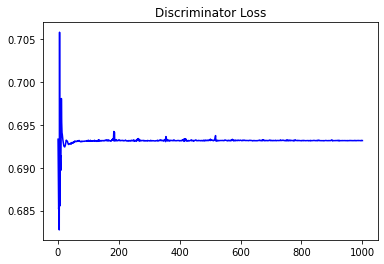

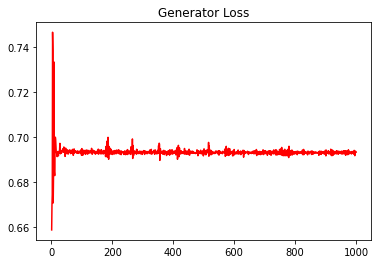

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0856845781288789


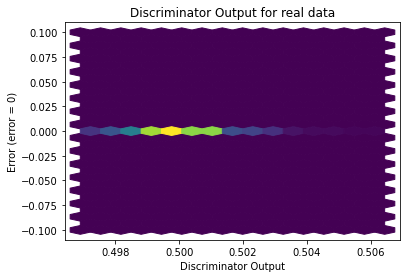

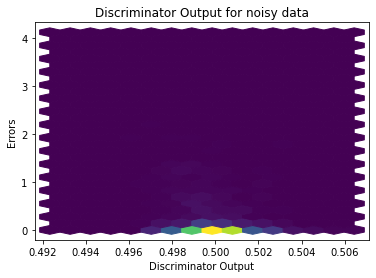

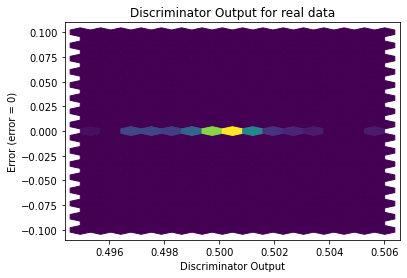

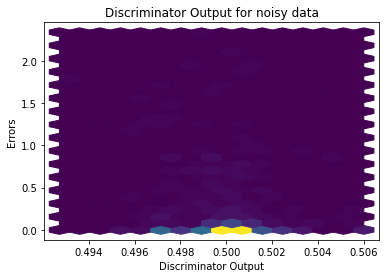

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


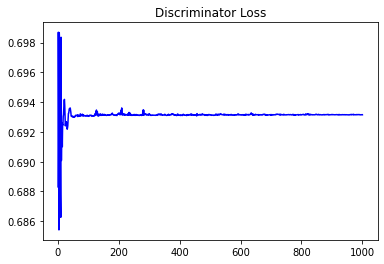

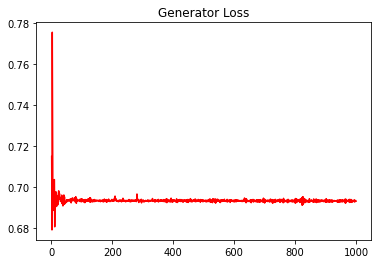

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07845757435878538


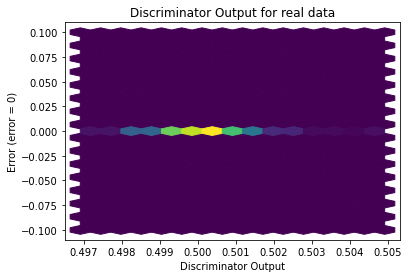

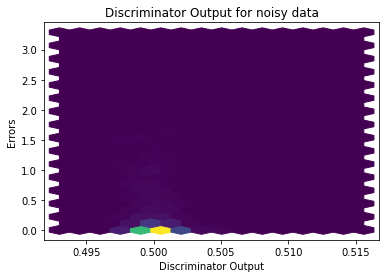

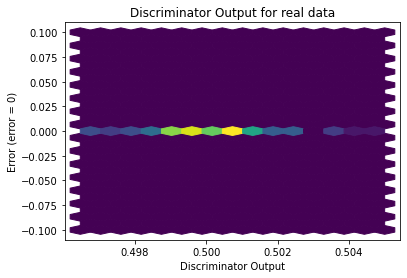

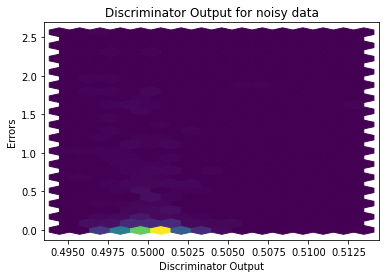

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2737]], requires_grad=True)
